## Brief introduction to R



### Interacting with the R Jupyter notebook

There are two types of Cells.
* "Markdown" cells allow you to write text like this one.
* The two cells below are "Code" cells. Type R commands into the cell and press shift-enter to compute the result.

In [1]:
2*3

[1] 6

In [2]:
10-3

[1] 7

The currently active Cell is indicated by a blue border and blue left margin. 

### R variables

A variable has a name and a value. For example, in the cell below we are assigning the value 2\*3 to the variable x. Press shift-enter to evaluate it.  Note that this command does not print the result on the screen (why?).

In [3]:
x = 2*3

To view the content of the variable *x*, just type its name and press shift-enter.

In [4]:
x

[1] 6

All variables in R are called *objects*. There are multiple types of objects in R, including scalars, vectors, matrices, arrays, data frames, tables, and lists.

A *vector* is a collection of *elements* of the same type.
We can use the `c()` function to create a vector with the name *myvector*.

In [5]:
myvector = c(8,6,9,10,5)

Type the name of this vector to see its value.

In [6]:
myvector

[1]  8  6  9 10  5

We can extract elements in the vector by its *index*. Here we are getting the first (position 1) and the fourth (position 4) element in the vector.

In [7]:
myvector[1]

[1] 8

In [8]:
myvector[4]

[1] 10

A *list* can contain elements of different types, for example, numbers or strings, or even vector. We can use the *list()* function to create a list. Values in the list can have names.

In [9]:
mylist = list("USA"="Washington DC","Canada"="Ottawa",myvector)

To see the content of *mylist*, just type its name.

In [10]:
mylist

$USA
[1] "Washington DC"

$Canada
[1] "Ottawa"

[[3]]
[1]  8  6  9 10  5

We can get individual elements of the list by the name or the index using *double square brackets*.

In [11]:
mylist[["Canada"]]

[1] "Ottawa"

In [12]:
mylist[[3]]

[1]  8  6  9 10  5

The `attributes` function gets all the names in the list.

### R functions
A *function* in R performs some calculations on input variables called *arguments* that are inside a round bracket. For example the `log10()` function calculates the base 10 log of the number passed in the round bracket.

In [13]:
log10(100)

[1] 2

The `mean` function calculates the mean of a vector.

In [14]:
mean(myvector)

[1] 7.6

The `length` function gives the number of elements in a vector.

In [15]:
length(myvector)

[1] 5

The *table* function takes a vector, finds all the possible unique values in the vector, and calculates the number of times that each value appears in the vector.

In [16]:
class_majors = c("Psychology","Public Health","Biology","Biology","Computer Science","Biology")
table(class_majors)

class_majors
         Biology Computer Science       Psychology    Public Health 
               3                1                1                1 

Functions can take multiple arguments. The *log(x,y)* function takes the base *y* log of *x*.

In [17]:
log(16,2)

[1] 4

In [18]:
log(27,3)

[1] 3

### Getting help on functions
A lot of functions that come with R or R packages provides *inline help*. This allows you to see how to call the functions and what the functions do.

Usually you can just type ? before the function name.

Try getting help for the `log` function.

In [19]:
?log

log {IRkernel},R Documentation
...,message to log


And for the `mean` function.

In [20]:
?mean

mean {base},R Documentation
x,"An R object. Currently there are methods for numeric/logical vectors and date, date-time and time interval objects. Complex vectors are allowed for trim = 0, only."
trim,the fraction (0 to 0.5) of observations to be trimmed from each end of x before the mean is computed. Values of trim outside that range are taken as the nearest endpoint.
na.rm,a logical value indicating whether NA values should be stripped before the computation proceeds.
...,further arguments passed to or from other methods.


## Single cell Ciona dataset - spatial dynamics

### Loading the R packages and the spatial dataset

Many people have written functions for doing analysis in R. The functions are put in R *packages* and *libraries* that must be installed or loaded so the functions can be used.

We use the `library` function here to load the `Seurat` package that provides many functions to analyze single-cell RNA-seq data, and the `RColorBrewer` package that tells R what colors we would use.  The `source` function loads the convenient functions that we use in this lab.

In [21]:
library(Seurat)
library(RColorBrewer)
source('../src/functions.R')

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“namespace ‘sn’ is not available and has been replaced
by .GlobalEnv when processing object ‘’”
Warning message:
“namespace ‘sn’ is not available and has been replaced
by .GlobalEnv when processing object ‘’”


We can now load the `hpf20` object from the R file *spatial.Robj*, which contains the analyzed information about the transcriptomes of cells collected at hpf20. Then load the *temporal.RObj* file that contains the trajectories of all the cell types.

In [22]:
load('../data/external/spatial.Robj')
load('../data/external/temporal.Robj')

After loading, you can call the `ls` function to check what variables are currently in the memory.

In [23]:
ls()

[1] "asm.test"           "class_majors"       "col"               
 [4] "fhp.test"           "genePlot.pseudo"    "genePlot.pseudo0"  
 [7] "genes.plot.pseudo"  "genes.plot.pseudo0" "hpf20"             
[10] "mylist"             "myvector"           "ps.asm"            
[13] "ps.fhp"             "ps.shp"             "shp.test"          
[16] "x"

## Reading the marker genes

We have a few text files that specify the differential expression of the marker genes in each cell type. Here we read these files into R and filter to keep the ones that show the strongest differential expression

In [24]:
heartGene = rownames(subset(read.table("../data/external/panHP_20.markers.txt"), power>0.5 & avg_diff>1))
asmGene = rownames(subset(read.table("../data/external/ASM_20.markers.txt"), power>0.5 & avg_diff>1))
shpSpecific = rownames(subset(read.table("../data/external/SHPspecific_20.markers.txt"),power>0.5&avg_diff>1))
fhpSpecific = rownames(subset(read.table("../data/external/FHPspecific_20.markers.txt"),power>0.5&avg_diff>1))    

**Exercise**: How many genes are in each of the vectors *heartGene*, *asmGene*, *shpSpecific* and *fhpSpecific*?  Try to calculate this in the cell below.

For the purpose of this lab, we will use up to 15 marker genes for each cell type.  We will also define a *AllGene* vector that holds all the (subset of) marker genes.

In [25]:
ASM = asmGene[1:15]
Heart = heartGene[1:15]
FHP_Specific = fhpSpecific[1:15]
SHP_Specific = shpSpecific
AllGene = c(heartGene[1:15], fhpSpecific[1:15], shpSpecific,asmGene[1:15])

### Getting information from the hpf20 object

In [26]:
hpf20

An object of class seurat in project allhpf
 14864 genes across 288 samples.

The *hpf20* object contains many datasets related to the analysis of hpf20 dataset.  We can get the raw sequencing read counts for each gene in each cell in the *raw.data* variable.

In [27]:
hpf20@raw.data

,hpf12_hpf12_p3_10_R1tophat_outcufflinks,hpf12_hpf12_p3_11_R1tophat_outcufflinks,hpf12_hpf12_p3_12_R1tophat_outcufflinks,hpf12_hpf12_p3_13_R1tophat_outcufflinks,hpf12_hpf12_p3_14_R1tophat_outcufflinks,hpf12_hpf12_p3_15_R1tophat_outcufflinks,hpf12_hpf12_p3_16_R1tophat_outcufflinks,hpf12_hpf12_p3_17_R1tophat_outcufflinks,hpf12_hpf12_p3_18_R1tophat_outcufflinks,hpf12_hpf12_p3_19_R1tophat_outcufflinks,⋯,hpf20_wei.20.v.89tophat,hpf20_wei.20.v.8tophat,hpf20_wei.20.v.90tophat,hpf20_wei.20.v.91tophat,hpf20_wei.20.v.92tophat,hpf20_wei.20.v.93tophat,hpf20_wei.20.v.94tophat,hpf20_wei.20.v.95tophat,hpf20_wei.20.v.96tophat,hpf20_wei.20.v.9tophat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1ORF158,0,5.148244,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
LASP/1,0,0.000000,2.967240e+00,0.3021299,0.0000000,0.000000e+00,0,0.000000e+00,3.939461e+00,3.649348,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
KH2013:KH.C1.100,0,0.000000,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
PDCD6IP,0,3.911399,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,3.205170e+00,3.007374e+00,2.843804,⋯,0,4.063306,0.000000,0,0,0.000000,2.691215964,0,0.000000,0
UBE2M,0,5.154291,3.494375e+00,0.0000000,0.0000000,5.286037e+00,0,0.000000e+00,3.666135e+00,3.237124,⋯,0,4.810142,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
KH2013:KH.C1.1002,0,0.000000,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
KH2013:KH.C1.1003_F49F1.1,0,0.000000,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
KATNA1,0,4.396392,3.622360e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000,⋯,0,0.000000,0.000000,0,0,0.000000,0.000000000,0,0.000000,0
PLCH1/2,0,3.124033,0.000000e+00,0.0000000,0.0000000,0.000000e+00,0,0.000000e+00,2.617819e+00,0.000000,⋯,0,4.221026,0.000000,0,0,0.000000,0.000000000,0,0.000000,0


### Plotting: tSNE plots, violin plots and heatmaps

The *hpf20* object contains information about a pre-computed tSNE plot.  We can use the `TSNEPlot` function to draw it 

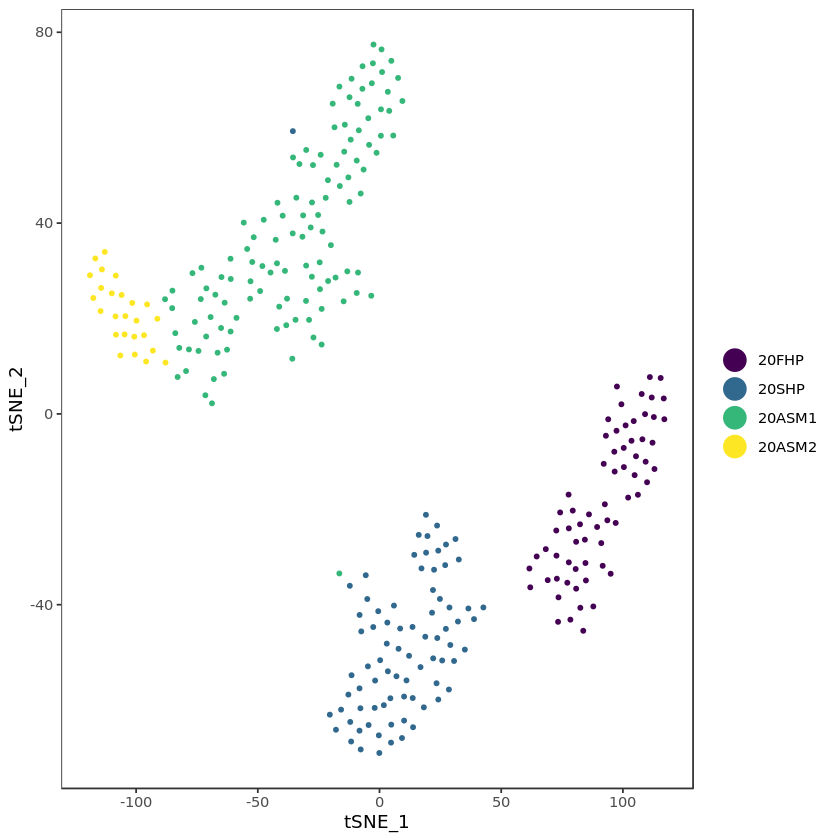

In [28]:
TSNEPlot(hpf20)

The `TSNEPlot` function can take many arguments that allow customizing the tSNE plot.

In [29]:
?TSNEPlot

TSNEPlot {Seurat},R Documentation
object,Seurat object
do.label,"FALSE by default. If TRUE, plots an alternate view where the center of each cluster is labeled"
pt.size,Set the point size
label.size,Set the size of the text labels
cells.use,Vector of cell names to use in the plot.
colors.use,Manually set the color palette to use for the points
...,"Additional parameters to DimPlot, for example, which dimensions to plot."


We can add the cell identity labels and change the colors of the inferred cell identity.

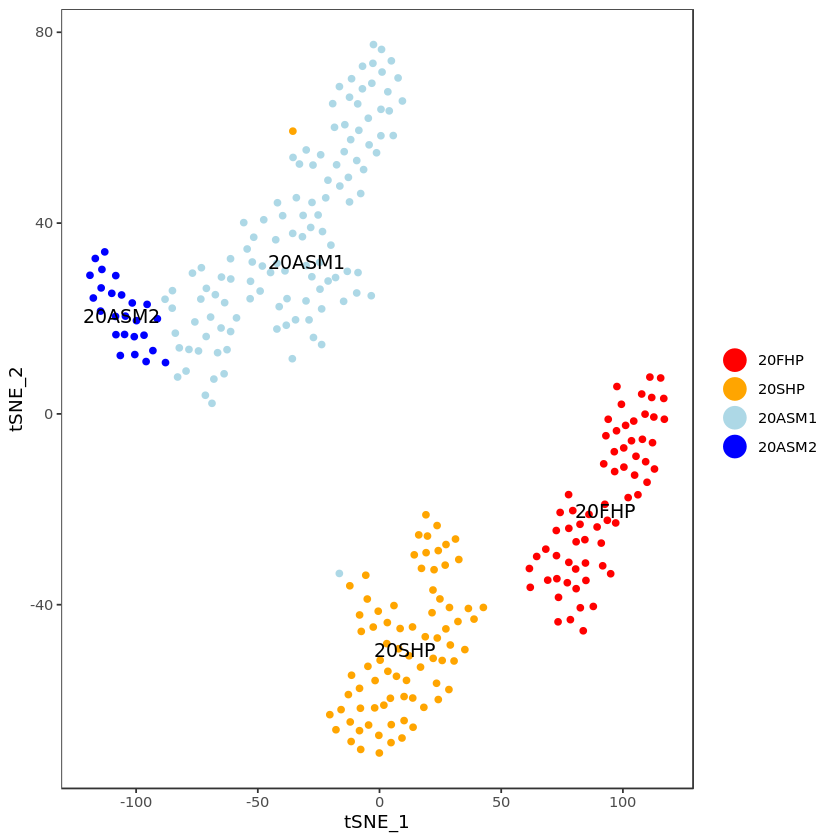

In [30]:
TSNEPlot(hpf20,do.label=TRUE,colors.use = c("red","orange","lightblue","blue"),pt.size = 1.5)

Using the `FetchData` function, we can take a look at the identity and the transformed dimsion of each cell.

In [31]:
FetchData(hpf20,c("ident","tSNE_1","tSNE_2"))

,ident,tSNE_1,tSNE_2
,<ord>,<dbl>,<dbl>
hpf20_wei.20.i.10tophat,20ASM1,-3.387013,24.771966
hpf20_wei.20.i.12tophat,20ASM1,-2.479125,77.422566
hpf20_wei.20.i.14tophat,20SHP,4.466224,-59.609459
hpf20_wei.20.i.15tophat,20ASM1,-18.056680,28.579309
hpf20_wei.20.i.16tophat,20ASM1,-12.320180,44.434205
hpf20_wei.20.i.17tophat,20SHP,22.415492,-32.663981
hpf20_wei.20.i.19tophat,20SHP,6.968025,-55.001974
hpf20_wei.20.i.20tophat,20SHP,12.139052,-50.708285
hpf20_wei.20.i.22tophat,20SHP,19.704500,-25.608085


`FetchData` can also get us the expression levels of EBF genes (ASM marker) in each cell?

In [32]:
FetchData(hpf20,'EBF1/2/3/4')

,EBF1/2/3/4
hpf20_wei.20.i.10tophat,4.886220
hpf20_wei.20.i.12tophat,4.061220
hpf20_wei.20.i.14tophat,0.000000
hpf20_wei.20.i.15tophat,6.384329
hpf20_wei.20.i.16tophat,4.965415
hpf20_wei.20.i.17tophat,0.000000
hpf20_wei.20.i.19tophat,0.000000
hpf20_wei.20.i.20tophat,2.011066
hpf20_wei.20.i.22tophat,0.000000
hpf20_wei.20.i.23tophat,5.930086


We can overlay the expression of the EBF genes onto the tSNE plot by the `FeaturePlot` function.  This is presented in Fig. 1b.

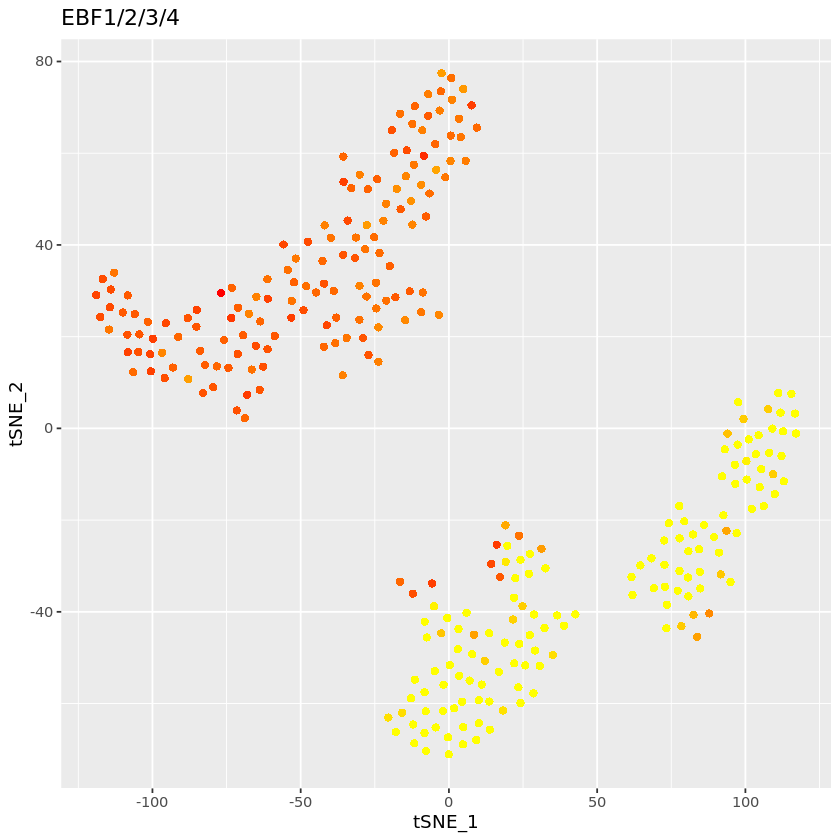

In [33]:
FeaturePlot(hpf20,features.plot = 'EBF1/2/3/4', pt.size = 2)

**Exercise**: Draw this for the heart maker gene 'GATA4/5/6'.

`FeaturePlot` can also take a vector of genes to draw all of them in multiple panels.  Recall the *ASM* variable is a vector of (a subset of) ASM makers.

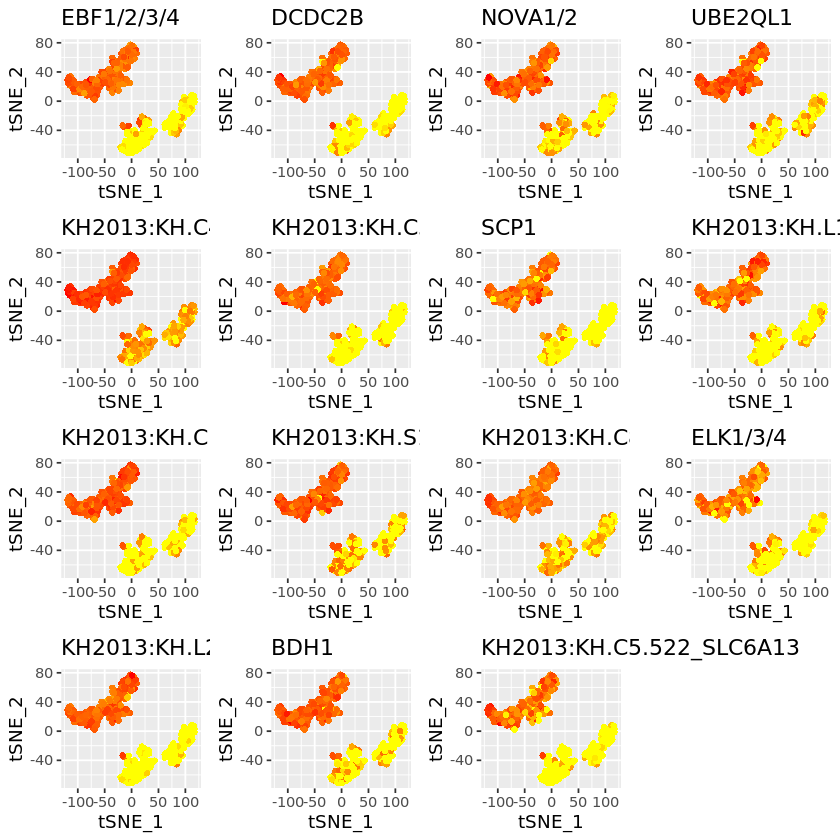

In [34]:
FeaturePlot(hpf20,features.plot = ASM,pt.size = 1.5)

What do the plots look like if you overlay the heart maker expression?

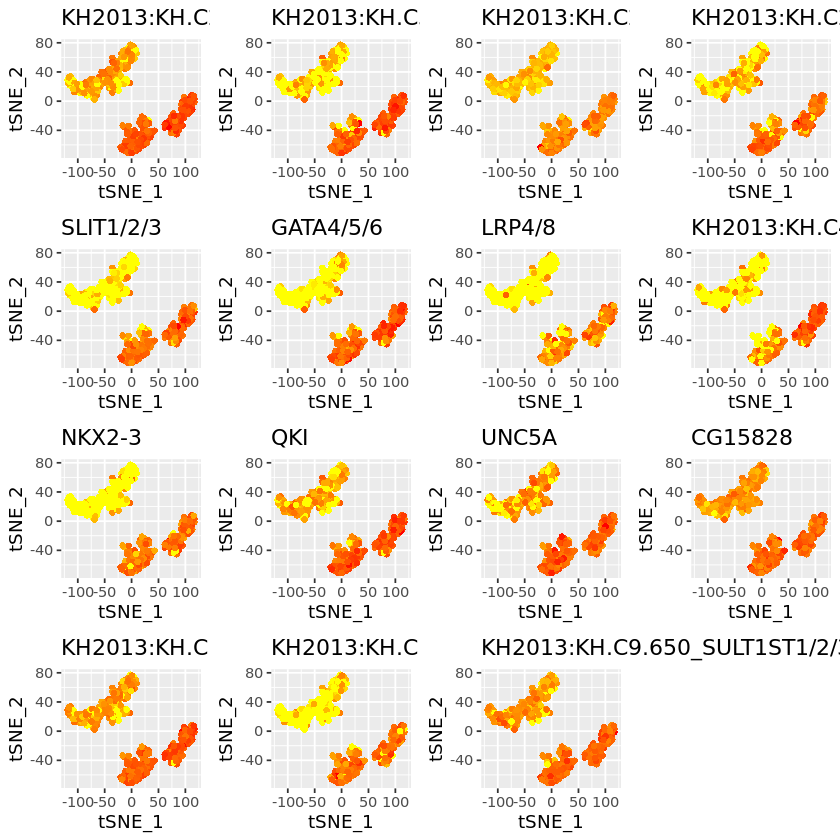

In [35]:
FeaturePlot(hpf20,features.plot = Heart,pt.size = 1.5)

Violin plots show the distribution of the markers in each cell type.  We first increase the size of the plot so each panel is visible (default is 7 by 7).

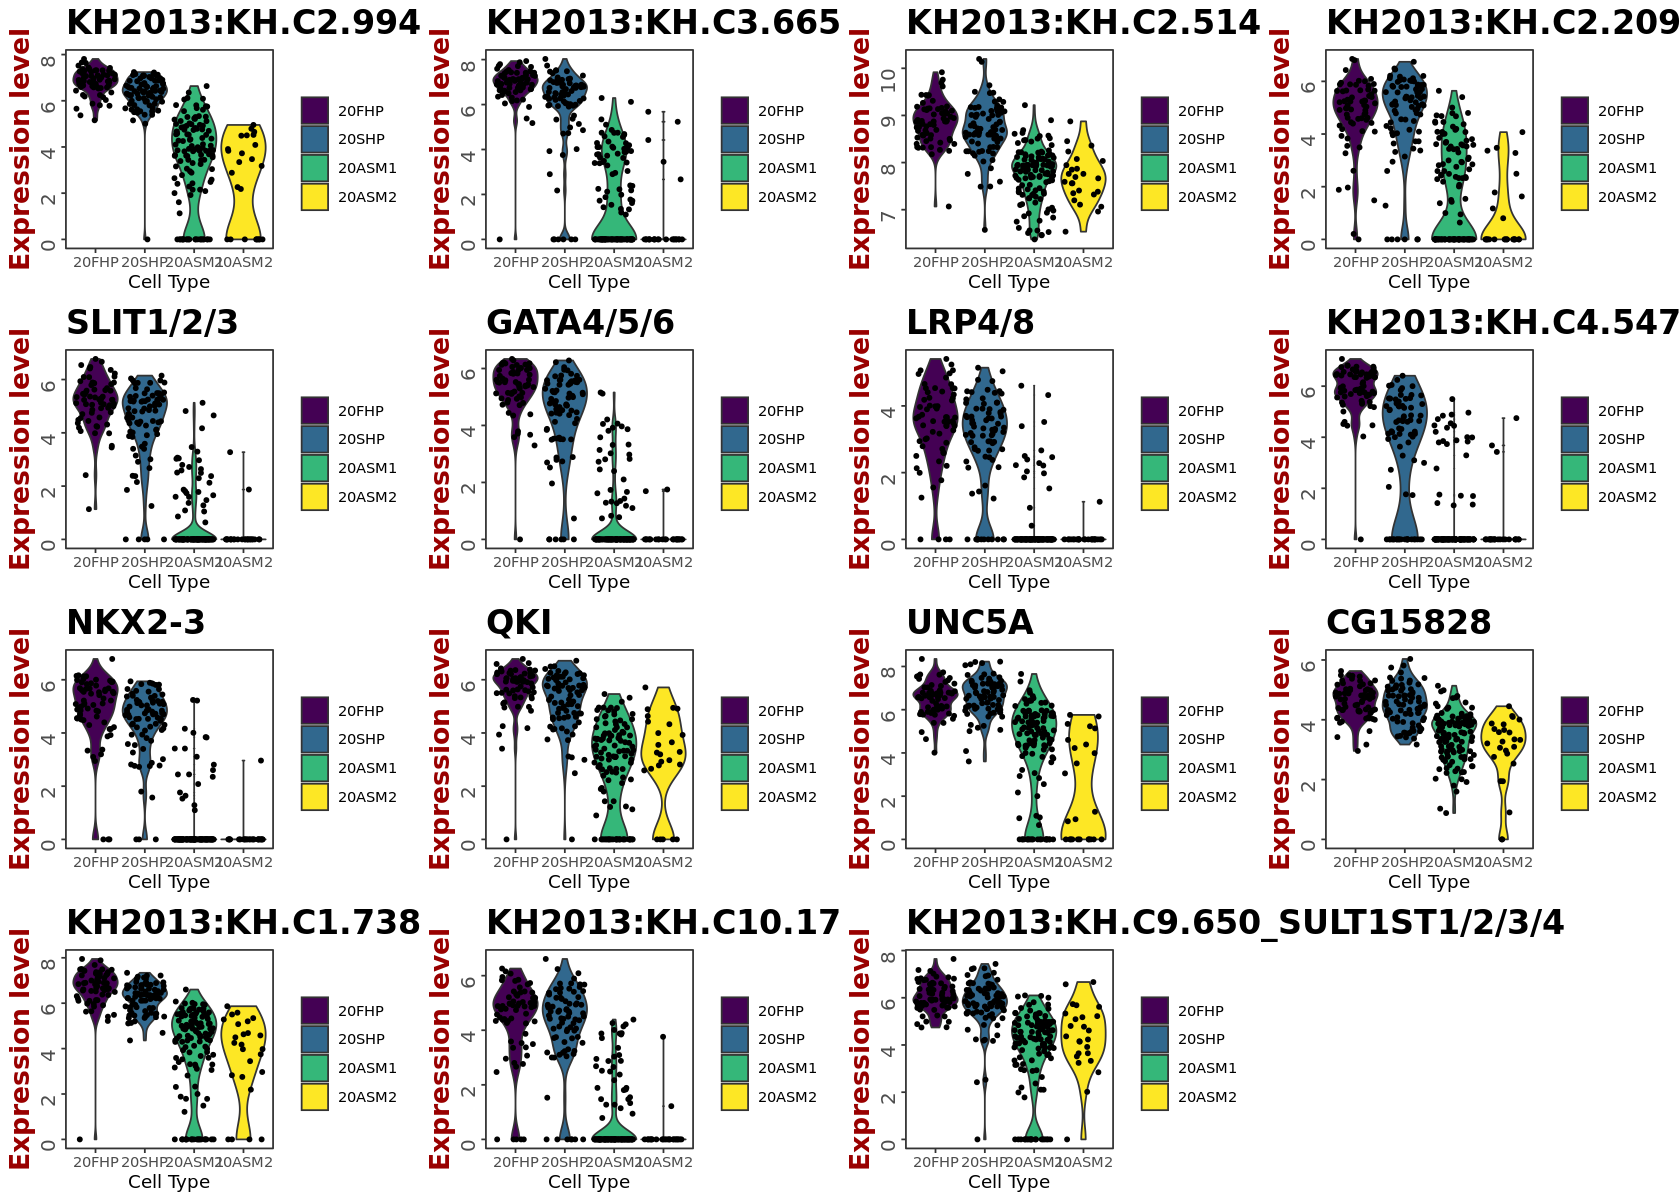

In [36]:
options(repr.plot.width = 14, repr.plot.height = 10)
VlnPlot(hpf20, Heart)

We can show the expression of all the markers across all the cell types in a heatmap.  Note we use all the marker genes stored in the *AllGene* variable.  This is already quite similar to the heatmap in Fig. 1c. We just need to change the color mapping and change the row/column orders.

Warning message in hmFunction(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in hmFunction(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


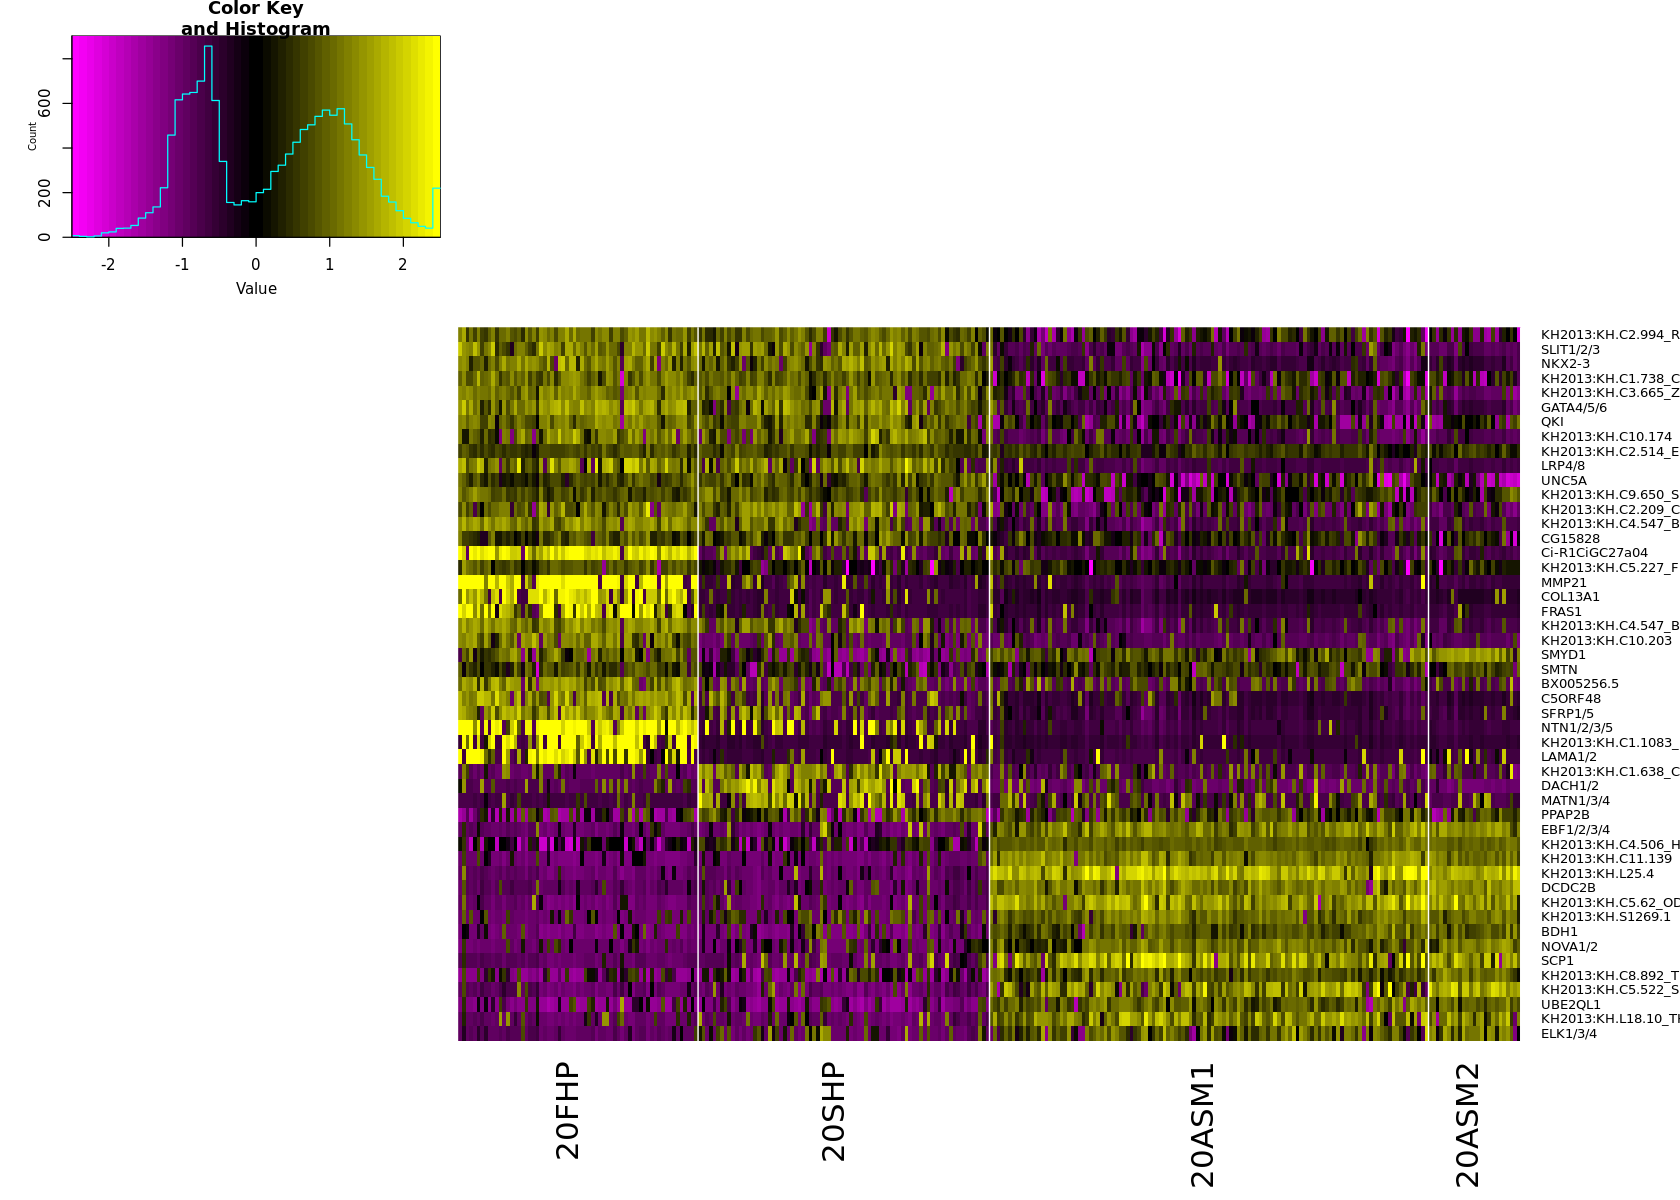

In [37]:
DoHeatmap(hpf20,genes.use=AllGene, order.by.ident = TRUE,slim.col.label = TRUE, draw.line = TRUE,mar=c(8,8))

The code below uses more options in the `DoHeatmap` function, getting pretty close to the one presented in Fig. 1c.

Warning message in hmFunction(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in hmFunction(data.use, Rowv = NA, Colv = NA, trace = "none", col = col.use, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


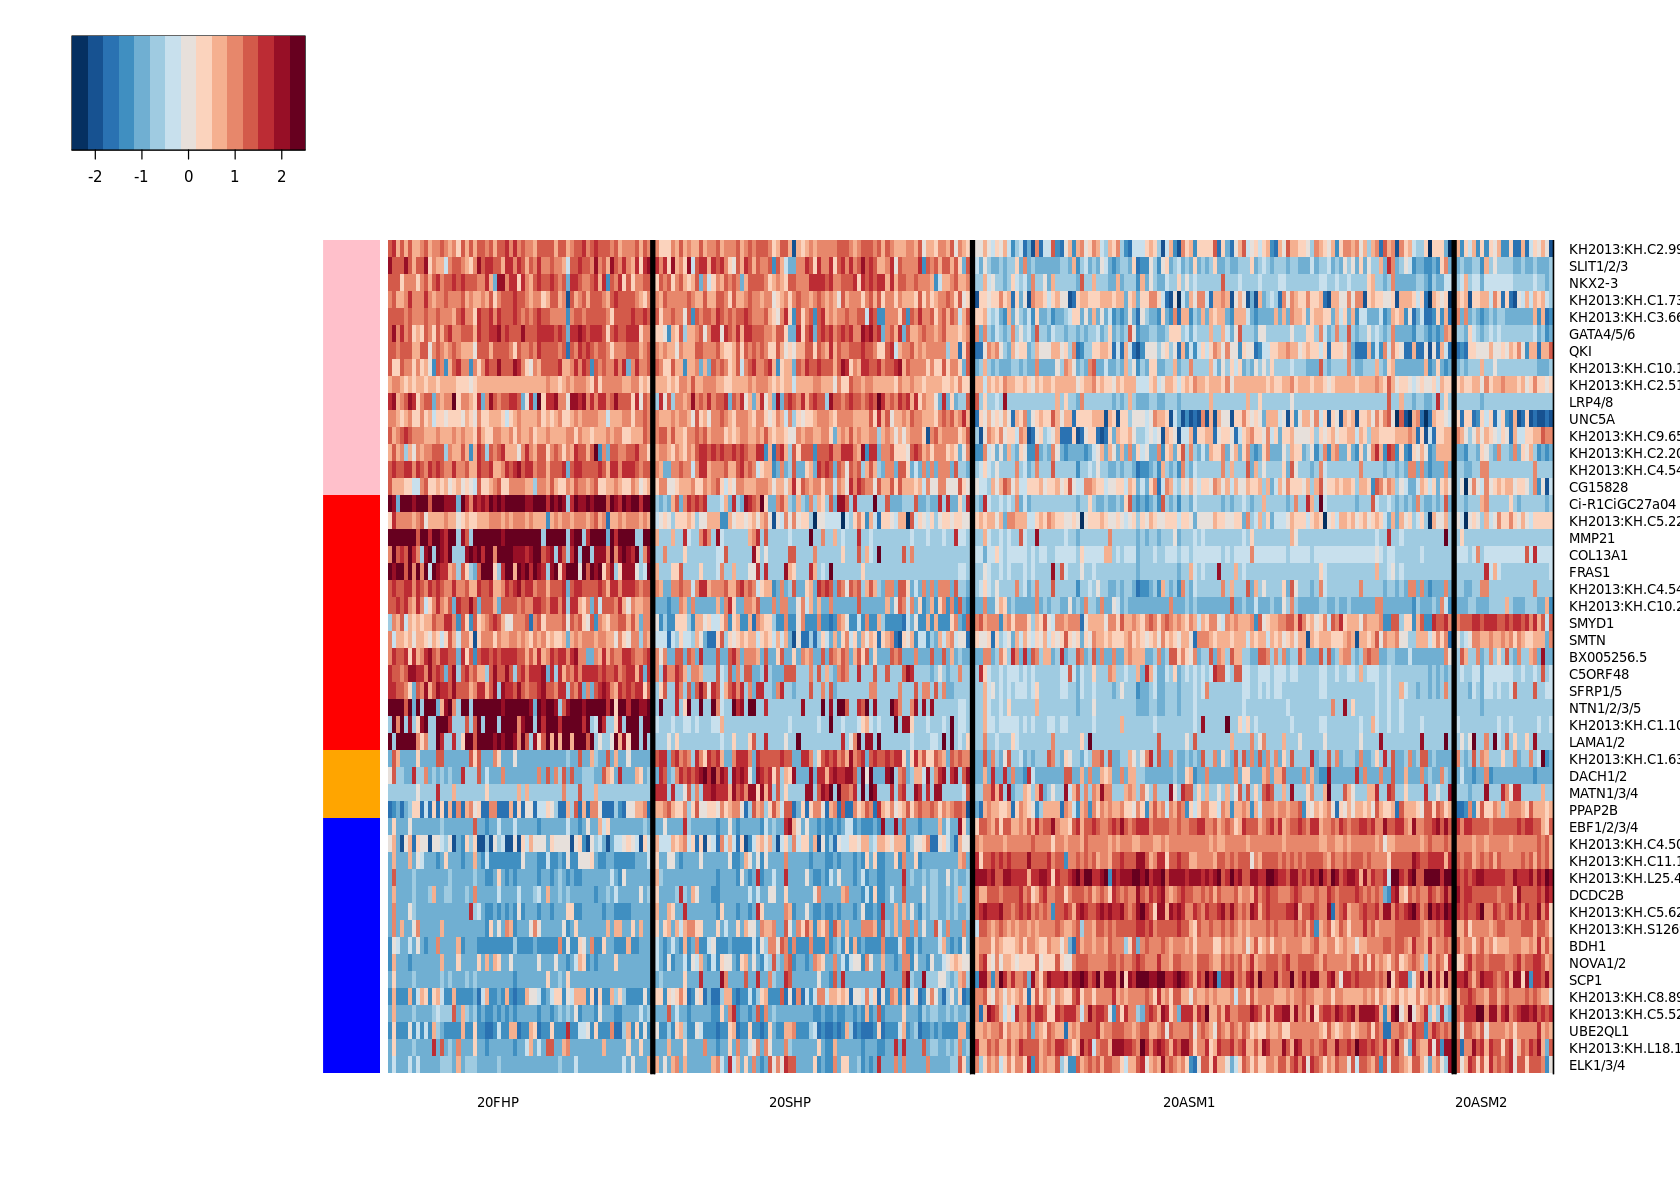

In [38]:
DoHeatmap(hpf20,genes.use = AllGene,order.by.ident = T,
          slim.col.label = T,draw.line = T,key.title = "Expression Level Scale",
          key.xlab = "", key.ylab = "",
          RowSideColors = c(rep("pink",15),rep("red",15),rep("orange",4),rep("blue",15)), 
          mar=c(8,8),col=col,sepcolor="black",sepwidth = c(1,0.2),
          srtCol=0,cex.col = 1,cexRow=1,keysize=1,density.info=c("none"))

### Single cell Ciona dataset - temporal dynamics

The *asm.test*, *shp.test*, and *fhp.test* objects that we loaded previously contain pre-computed trajectories for the ASM, SHP and FHP clusters, respectively.  The *ps.asm*, *ps.shp* and *ps.fhp* objects contain the pre-computed regulatory state transition times for the correspoding trajectories.

Here we plot the expression of the SHP marker 'DACH1/2' along the SHP pseudotime trajectory, mark the activation pseudotime (purple vertical line), and the transition between regulatory states. This reproduceds Fig. 2f middle panel.

We first reset the figure size back to the original 7 by 7.

Warning message:
“'fetch.data' is deprecated.
Use 'FetchData' instead.
See help("Deprecated") and help("Seurat-deprecated").”
Warning message:
“'fetch.data' is deprecated.
Use 'FetchData' instead.
See help("Deprecated") and help("Seurat-deprecated").”


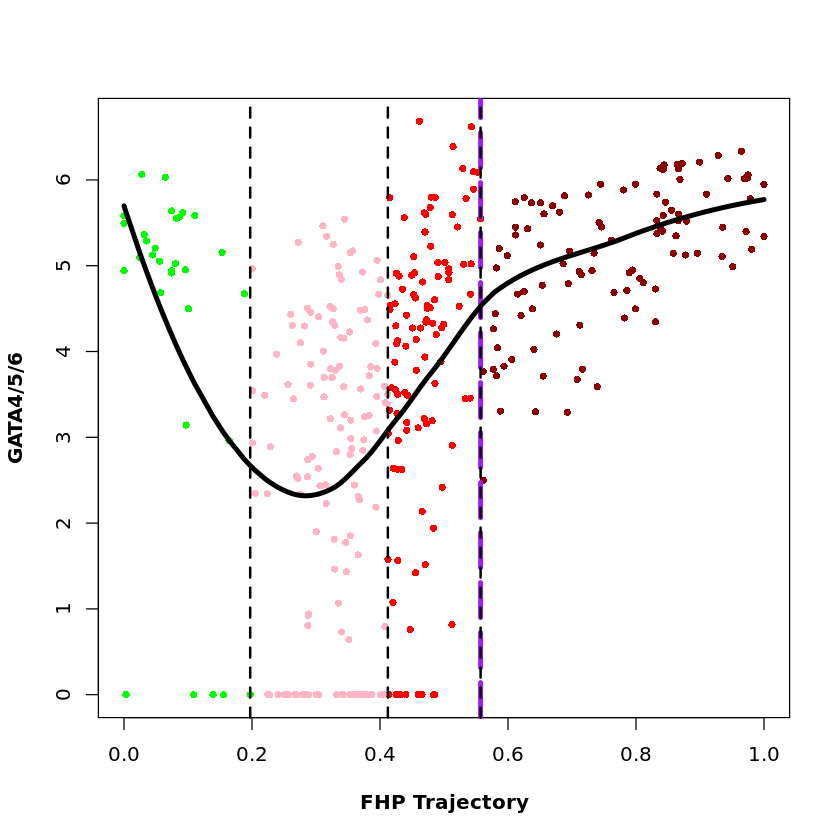

In [39]:
options(repr.plot.width = 7, repr.plot.height = 7)
genePlot.pseudo(fhp.test,gene='GATA4/5/6',
                col.use = c("green","pink1","red1","red4"),
                do.spline = T,
                name.x = "FHP Trajectory",
                cex.use = 0.8,cex.lab=1,do.logit = T)
abline(v=ps.fhp,lwd=2,lty=2)

We can also plot all the FHP marker genes.

Warning message:
“'fetch.data' is deprecated.
Use 'FetchData' instead.
See help("Deprecated") and help("Seurat-deprecated").”


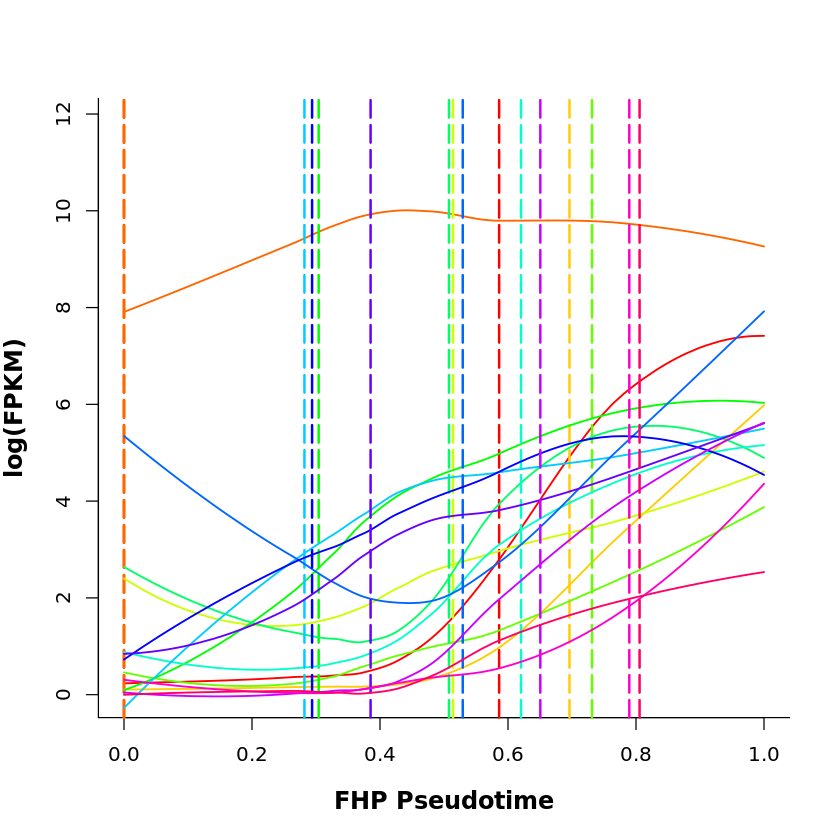

In [40]:
genes.plot.pseudo(fhp.test,genes.use = FHP_Specific, lwd=1.5, name.x = "FHP")

## Breakout Room Exercises

1. Show the expression of FHP marker 'MMP21' and SHP marker 'DACH1/2' the tSNE plot.  Then reproduce the violin plots in Fig. 1d for 'MMP21' and 'DACH1/2'.  What are the pro's and con's of each representation?


2. How is the ASM marker 'EBF1/2/3/4' expressed along the ASM pseudotime trajectory (i.e., reproduce the EBF panel in Fig. 3a)?  Along the FHP trajectory?
  * The colors use in that figure is `c("green","yellow","lightblue","blue1","blue4")`.


3. Create a heatmap of the ASM trajectory, i.e., using the `DoHeatmap` function with the *asm.test* object and *ASM* gene list, and compare to the heatmap in Fig. 3b.